# LaVague

## Installing pre-requisites

### Selenium headless Chrome driver

We will pilot a Selenium browser and have to install the headless version to be run in this notebook

In [ ]:
#!/usr/bin/bash

!echo "Update the repository and any packages..."
!sudo apt update && sudo apt upgrade -y

!echo "Install prerequisite system packages..."
!sudo apt install wget curl unzip jq -y

# Set metadata for Google Chrome repository...
!wget https://storage.googleapis.com/chrome-for-testing-public/122.0.6261.94/linux64/chrome-linux64.zip

!echo "Install Chrome dependencies..."
!sudo apt install ca-certificates fonts-liberation \
    libappindicator3-1 libasound2 libatk-bridge2.0-0 libatk1.0-0 libc6 \
    libcairo2 libcups2 libdbus-1-3 libexpat1 libfontconfig1 libgbm1 \
    libgcc1 libglib2.0-0 libgtk-3-0 libnspr4 libnss3 libpango-1.0-0 \
    libpangocairo-1.0-0 libstdc++6 libx11-6 libx11-xcb1 libxcb1 \
    libxcomposite1 libxcursor1 libxdamage1 libxext6 libxfixes3 libxi6 \
    libxrandr2 libxrender1 libxss1 libxtst6 lsb-release wget xdg-utils -y

!echo "Unzip the binary file..."
!unzip chrome-linux64.zip

!echo "Downloading latest Chromedriver..."
!wget https://storage.googleapis.com/chrome-for-testing-public/122.0.6261.94/linux64/chromedriver-linux64.zip

!echo "Unzip the binary file and make it executable..."
!unzip chromedriver-linux64.zip

!echo "Install Selenium..."
!python3 -m pip install selenium

!echo "Removing archive files"
!rm chrome-linux64.zip  chromedriver-linux64.zip

Update the repository and any packages...
Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [50.4 kB]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:8 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,517 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,346 kB]
Hit:13 http

### Requirements

In [ ]:
!wget https://raw.githubusercontent.com/dhuynh95/LaVague/main/requirements.txt
!pip install -r requirements.txt

import locale
locale.getpreferredencoding = lambda: "UTF-8"

--2024-03-03 23:46:03--  https://raw.githubusercontent.com/dhuynh95/LaVague/main/requirements.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 190 [text/plain]
Saving to: ‘requirements.txt’

requirements.txt    100%[===================>]     190  --.-KB/s    in 0s      

2024-03-03 23:46:03 (17.7 MB/s) - ‘requirements.txt’ saved [190/190]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.2/488.2 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 78.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 89.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 2

## Choosing inference engine

LaVague works with two kind of inference:
- Local
- API with Hugging Face Inference API

Local model allows full control over the experience, but might be slower to setup.
Starting with Hugging Face Inference API is good for a quick start but lacks flexibility and control.

Both options work, but in this Colab notebook, it might take longer to run with local model as weights download can take a while.

### Hugging Face Inference API

To have a fast and low-cost experience, we will use [Hugging Face Inference for PRO users](https://huggingface.co/blog/inference-pro).
You can swap the call to the ``Nous-Hermes-2-Mixtral-8x7B-DPO``.

You will need a Hugging Face Hub Token to use the ``Nous-Hermes-2-Mixtral-8x7B-DPO`` model from the Inference API. You can get one by signing up on the [Hugging Face Hub](https://huggingface.co/join).

If you prefer using a local model, skip to the next section [Local model](#Local-model).

In [ ]:
from llama_index.llms.huggingface import HuggingFaceInferenceAPI

try:
  from google.colab import userdata
  HF_TOKEN = userdata.get('HF_TOKEN')
except:
  import os
  HF_TOKEN = os.environ["HF_TOKEN"]

if not HF_TOKEN:
  from getpass import getpass
  HF_TOKEN = getpass('Enter your HF Token (https://huggingface.co/docs/hub/en/security-tokens): ')

model_id = "NousResearch/Nous-Hermes-2-Mixtral-8x7B-DPO"
max_new_tokens = 512

llm = HuggingFaceInferenceAPI(model_name=model_id, token=HF_TOKEN, num_output=max_new_tokens)

### Local model

Here we will use the latest ``HuggingFaceH4/zephyr-7b-gemma-v0.1`` to do local inference.

In [ ]:
!pip install accelerate

In [ ]:
!pip install -i https://pypi.org/simple/ bitsandbytes

Looking in indexes: https://pypi.org/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.0/105.0 MB 9.8 MB/s eta 0:00:00


In [ ]:
from llama_index.llms.huggingface import HuggingFaceLLM
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig
import torch

model_id = "HuggingFaceH4/zephyr-7b-gemma-v0.1"

quantization_config = BitsAndBytesConfig(
load_in_4bit=True,
bnb_4bit_use_double_quant=True,
bnb_4bit_quant_type="nf4",
bnb_4bit_compute_dtype=torch.bfloat16
)

tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForCausalLM.from_pretrained(model_id, device_map="auto", quantization_config=quantization_config)

# We will stop generation as soon as the model outputs the end of Markdown to make inference faster
stop_token_id = [tokenizer.convert_tokens_to_ids("```"), tokenizer.convert_tokens_to_ids("``")]
llm = HuggingFaceLLM(model=model, tokenizer=tokenizer, max_new_tokens=1024, stopping_ids=stop_token_id)

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

## Setting up embedding model and prompt template

We will use a ``bge-small-en-v1.5`` to perform semantic search.

In [ ]:
from llama_index.embeddings.huggingface import HuggingFaceEmbedding

embed_model = "BAAI/bge-small-en-v1.5"
embedder = HuggingFaceEmbedding(model_name=embed_model, device="cuda")

We will use a specific prompt template that leverages Few shot learning with Chain of Thought to ensure the model performs correctly for our use case of Selenium code generation.

You can have a look at the template [here](https://github.com/dhuynh95/LaVague/blob/main/prompt_template.txt).

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

!wget https://raw.githubusercontent.com/dhuynh95/LaVague/main/prompt_template.txt

with open("prompt_template.txt", "r") as file:
  PROMPT_TEMPLATE_STR = file.read()

## Preparing the action engine

Here we will use llama_index to create an action engine that will be able to execute the instructions we will give it.

It will index the HTML of the current page to retrieve the most relevant information to feed the LLM to then generate Selenium code to execute.

In [ ]:
from llama_index.core import Document
from llama_index.core.node_parser import CodeSplitter
from llama_index.retrievers.bm25 import BM25Retriever
from llama_index.core import VectorStoreIndex
from llama_index.core.query_engine import RetrieverQueryEngine
from llama_index.core import get_response_synthesizer
from llama_index.core import PromptTemplate
import time

MAX_CHARS = 1500
K = 3

class ActionEngine:
    def __init__(self, llm, embedding):
        self.llm = llm
        self.embedding = embedding

    def _get_index(self, html):
        text_list = [html]
        documents = [Document(text=t) for t in text_list]

        splitter = CodeSplitter(
            language="html",
            chunk_lines=40,  # lines per chunk
            chunk_lines_overlap=200,  # lines overlap between chunks
            max_chars=MAX_CHARS,  # max chars per chunk
        )
        nodes = splitter.get_nodes_from_documents(documents)
        nodes = [node for node in nodes if node.text]

        index = VectorStoreIndex(nodes, embed_model=self.embedding)

        return index

    def get_action(self, query, state):
        html = state
        index = self._get_index(html)

        retriever = BM25Retriever.from_defaults(
            index=index,
            similarity_top_k=K,
        )

        response_synthesizer = get_response_synthesizer(llm=self.llm)

        # assemble query engine
        query_engine = RetrieverQueryEngine(
            retriever=retriever,
            response_synthesizer=response_synthesizer,
        )

        prompt_template = PromptTemplate(PROMPT_TEMPLATE_STR)

        query_engine.update_prompts(
            {"response_synthesizer:text_qa_template": prompt_template}
        )

        print("Querying LLM...")

        start_time = time.time()

        output = query_engine.query(query)

        end_time = time.time()
        execution_time = end_time - start_time
        print(f"Code generation time: {execution_time} seconds")

        print(f"Source nodes : {output.get_formatted_sources(MAX_CHARS)}")
        code = output.response.split("```")[0]

        return code

## Code execution in action

In [ ]:
def execute_instructions(instructions, action_engine, driver, clear_display=True):
    for instruction in instructions:
        driver.save_screenshot('screenshot.png')
        if clear_display:
            clear_output(wait=True)
        display(Image(filename="screenshot.png"))
        print(f"Processing instruction: {instruction}")
        code = action_engine.get_action(instruction, driver.page_source)
        print(f"Code received: {code}")
        try:
            start_time = time.time()

            exec(code)

            end_time = time.time()
            execution_time = end_time - start_time
            print(f"Code execution time: {execution_time} seconds")

            print("Code execution successful")

        except Exception as e:
            print(f"Error executing code: {e}")
        driver.save_screenshot('screenshot.png')
        if clear_display:
            clear_output(wait=True)
        display(Image(filename="screenshot.png"))

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys

from IPython.display import Image, display, clear_output

## Setup chrome options
chrome_options = Options()
chrome_options.add_argument("--headless") # Ensure GUI is off
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--window-size=1600,900")

# Set path to chrome/chromedriver as per your configuration
chrome_options.binary_location = "/content/chrome-linux64/chrome"
webdriver_service = Service("/content/chromedriver-linux64/chromedriver")

# Choose Chrome Browser
driver = webdriver.Chrome(service=webdriver_service, options=chrome_options)

action_engine = ActionEngine(llm, embedder)

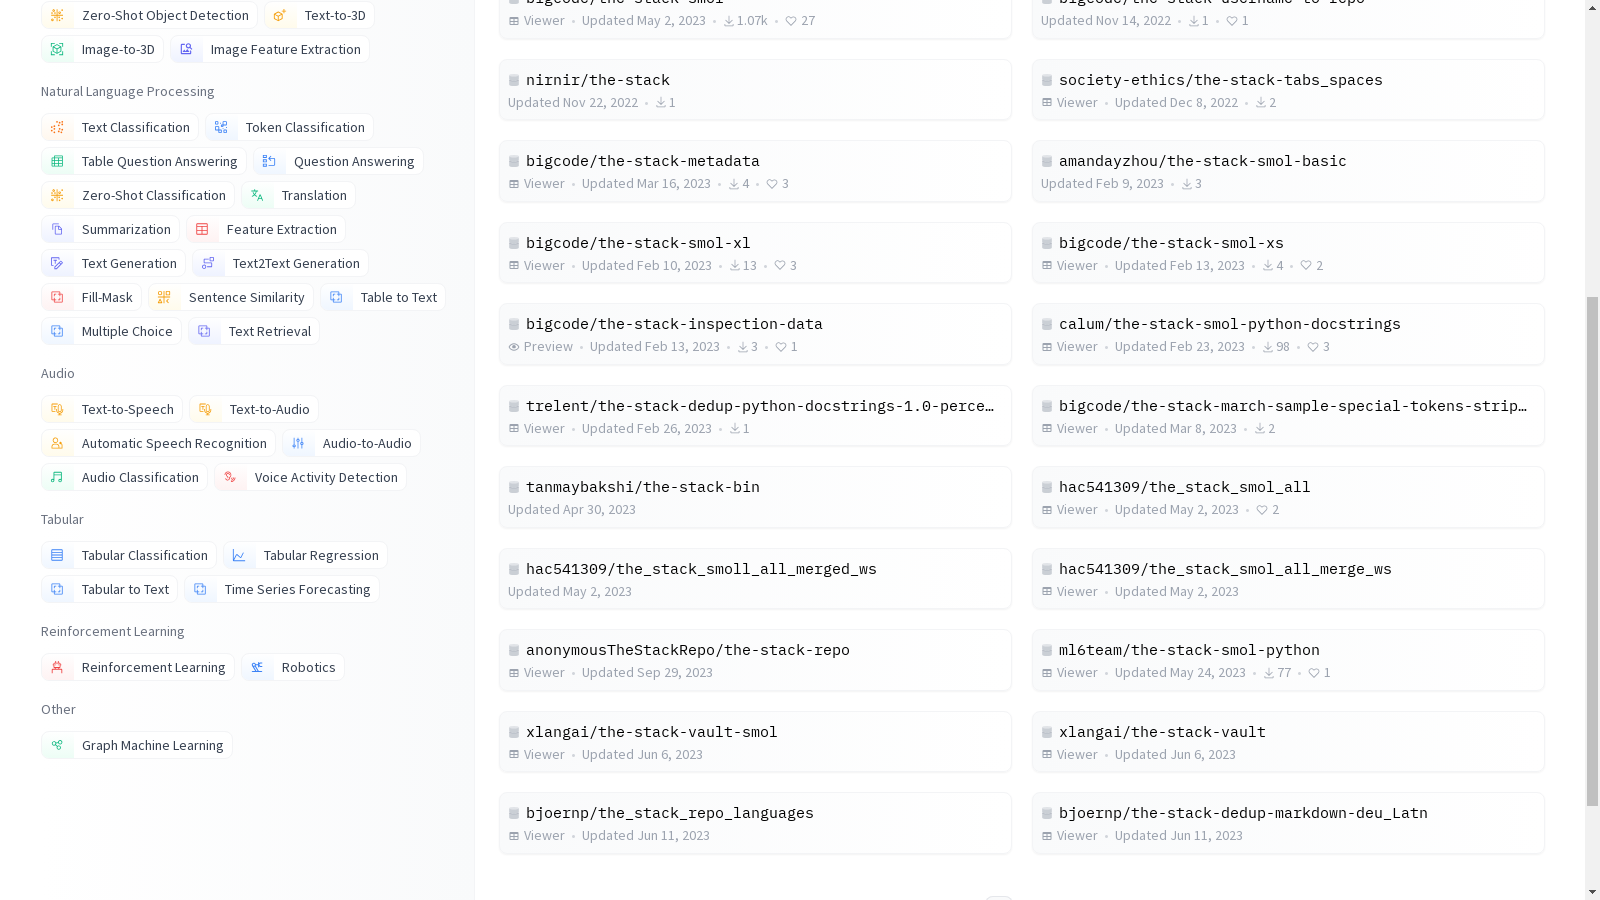

In [ ]:
driver = webdriver.Chrome(service=webdriver_service, options=chrome_options)
driver.get("https://huggingface.co/")

instructions = ["Click on the Datasets item on the menu, between Models and Spaces",
                "Click on the search bar 'Filter by name', type 'The Stack', and press 'Enter'",
                "Scroll by 500 pixels",]

execute_instructions(instructions, action_engine, driver)

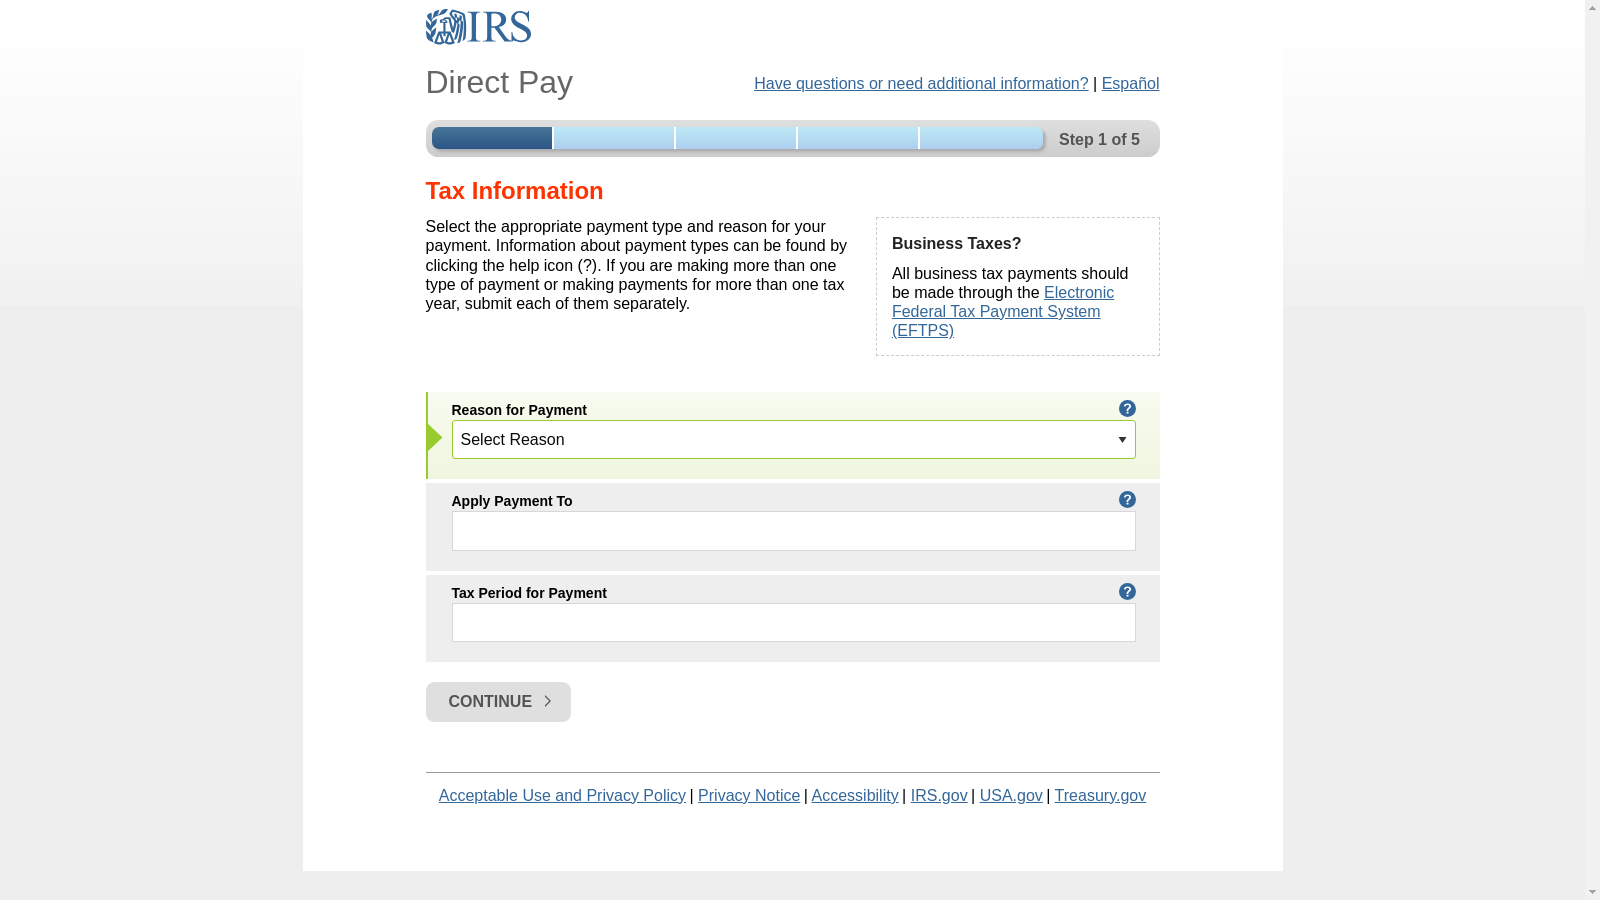

In [ ]:
driver = webdriver.Chrome(service=webdriver_service, options=chrome_options)
driver.get("https://www.irs.gov/")

instructions = ["Click on the 'Pay' item on the menu, between 'File' and 'Refunds'",
                "Click on 'Pay Now with Direct Pay' just below 'Pay from your Bank Account'",
                "Click on 'Make a Payment', just above 'Answers to common questions'",]

execute_instructions(instructions, action_engine, driver)